In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
data.shape

(200, 5)

In [3]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

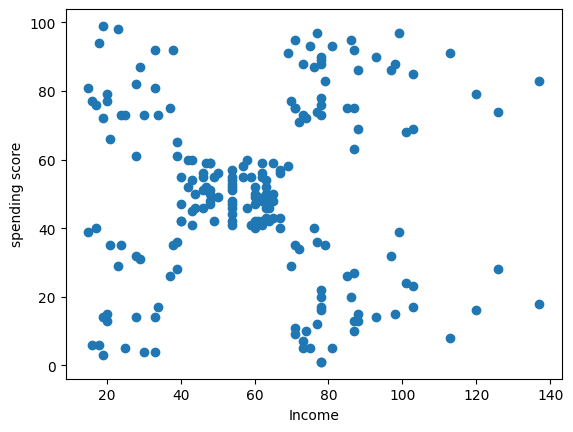

In [4]:
plt.scatter(x[...,0], x[...,1])
plt.xlabel('Income')
plt.ylabel('spending score')
plt.show()

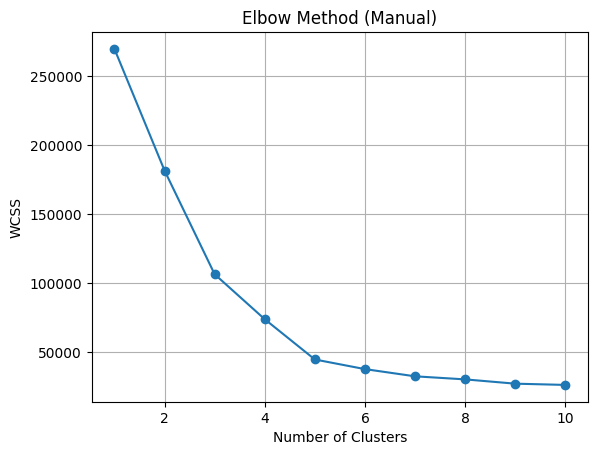

In [5]:

import numpy as np
import matplotlib.pyplot as plt

def euclidean_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def compute_wcss(points, centroids, labels):
    wcss = 0
    for i, point in enumerate(points):
        centroid = centroids[labels[i]]
        wcss += euclidean_dist(point, centroid) ** 2
    return wcss

def manual_kmeans(X, k, max_iter=100):
    # Step 1: Randomly choose k initial centroids
    np.random.seed(0)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([
            np.argmin([euclidean_dist(x, c) for c in centroids]) for x in X
        ])
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
            for i in range(k)
        ])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Run manual KMeans for 1 to 10 clusters and compute WCSS
wcss = []
for k in range(1, 11):
    centroids, labels = manual_kmeans(x, k)
    wcss.append(compute_wcss(x, centroids, labels))

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Manual)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [6]:
# kmeadian
import numpy as np

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def manual_kmedians(x, k, max_iter=100, random_state=22):
    np.random.seed(random_state)
    # Step 1: Randomly choose k initial centroids from data
    indices = np.random.choice(len(x), k, replace=False)
    centroids = x[indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest centroid using Manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(point, centroid) for centroid in centroids])
            for point in x
        ])

        # Step 3: Recalculate centroids using the median
        new_centroids = np.array([
            np.median(x[labels == i], axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Example usage
# x = your input numpy array (e.g., x = data.values)
labels, centroids = manual_kmedians(x, k=5, random_state=22)

print(labels)


[2 1 2 1 2 1 2 4 2 1 2 4 2 1 2 1 2 3 2 4 2 1 2 1 2 1 2 3 2 4 2 1 2 4 2 1 2
 1 2 1 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 4 0 1 0 4 0 1 0 1 0 1 0 4 0 1 0 1 0 4 0 4 0 4 0 1
 0 4 0 4 0 1 0 4 0 1 0 1 0 4 0 4 0 1 0 4 0 1 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0
 4 0 1 0 4 0 1 0 4 0 1 0 1 0 4]


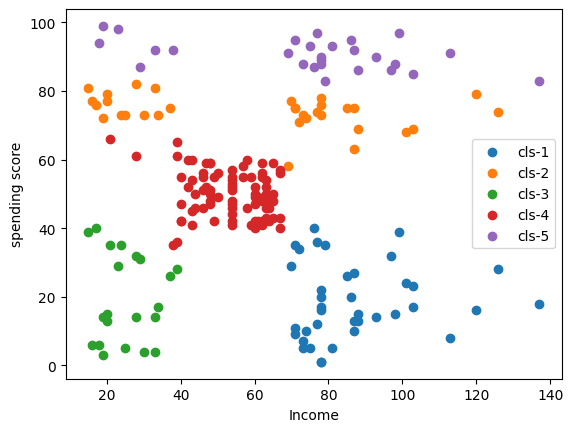

In [7]:
plt.scatter(x[labels==0,0], x[labels==0,1], label='cls-1')
plt.scatter(x[labels==1,0],x[labels ==1,1], label='cls-2')
plt.scatter(x[labels==2,0], x[labels==2,1], label='cls-3')
plt.scatter(x[labels==3,0],x[labels ==3,1], label='cls-4')
plt.scatter(x[labels==4,0], x[labels==4,1], label='cls-5')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()